In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv("/content/drive/MyDrive/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [77]:
# Get information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int32         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [78]:
# 1. List the top 10 countries that won the most Nobel Prizes

country = df['organization_country'].value_counts().head(10)
print(pd.DataFrame(country))

                                     count
organization_country                      
United States of America               341
United Kingdom                          89
Germany                                 43
France                                  36
Federal Republic of Germany             23
Switzerland                             21
Sweden                                  17
Japan                                   16
Netherlands                             11
Union of Soviet Socialist Republics      9


In [79]:
# 2. List the first women to win Nobel Prizes and the prizes they received

women_winners = df[df['sex'] == 'Female'].sort_values(by='year')
women_winners = women_winners.drop_duplicates(subset=['full_name'])
women_winners = (women_winners[['year', 'full_name','prize','organization_country']])
women_winners.head(10)

,year,full_name,prize,organization_country
19,1903,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,NaN
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,NaN
51,1909,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,NaN
128,1926,Grazia Deledda,The Nobel Prize in Literature 1926,NaN
141,1928,Sigrid Undset,The Nobel Prize in Literature 1928,NaN
160,1931,Jane Addams,The Nobel Peace Prize 1931,NaN
179,1935,Irène Joliot-Curie,The Nobel Prize in Chemistry 1935,France
198,1938,Pearl Buck,The Nobel Prize in Literature 1938,NaN
218,1945,Gabriela Mistral,The Nobel Prize in Literature 1945,NaN
229,1946,Emily Greene Balch,The Nobel Peace Prize 1946,NaN


In [80]:
# 2. List the first women who received awards only with an organization_country and the awards they received

women_winners = df[(df['sex'] == 'Female') & (~df['organization_country'].isna())]
women_winners = women_winners.drop_duplicates(subset=['full_name'])
first_women_winners = women_winners.sort_values("year")
filtered_women_winners = first_women_winners[['year','full_name','prize', 'organization_country']]
filtered_women_winners.head(10)

,year,full_name,prize,organization_country
62,1911,"Marie Curie, née Sklodowska",The Nobel Prize in Chemistry 1911,France
179,1935,Irène Joliot-Curie,The Nobel Prize in Chemistry 1935,France
235,1947,"Gerty Theresa Cori, née Radnitz",The Nobel Prize in Physiology or Medicine 1947,United States of America
351,1963,Maria Goeppert Mayer,The Nobel Prize in Physics 1963,United States of America
353,1964,Dorothy Crowfoot Hodgkin,The Nobel Prize in Chemistry 1964,United Kingdom
478,1977,Rosalyn Yalow,The Nobel Prize in Physiology or Medicine 1977,United States of America
539,1983,Barbara McClintock,The Nobel Prize in Physiology or Medicine 1983,United States of America
566,1986,Rita Levi-Montalcini,The Nobel Prize in Physiology or Medicine 1986,Italy
586,1988,Gertrude B. Elion,The Nobel Prize in Physiology or Medicine 1988,United States of America
656,1995,Christiane Nüsslein-Volhard,The Nobel Prize in Physiology or Medicine 1995,Federal Republic of Germany


In [81]:
# 3. List the first men to win Nobel Prizes and the prizes they received

men_winners = df[df['sex'] == 'Male'].sort_values(by='year')
men_winners = men_winners.drop_duplicates(subset=['full_name'])
men_winners = (men_winners[['year', 'full_name','prize','organization_country']])
men_winners.head(10)

,year,full_name,prize,organization_country
0,1901,Jacobus Henricus van 't Hoff,The Nobel Prize in Chemistry 1901,Germany
1,1901,Sully Prudhomme,The Nobel Prize in Literature 1901,NaN
2,1901,Emil Adolf von Behring,The Nobel Prize in Physiology or Medicine 1901,Germany
3,1901,Jean Henry Dunant,The Nobel Peace Prize 1901,NaN
4,1901,Frédéric Passy,The Nobel Peace Prize 1901,NaN
5,1901,Wilhelm Conrad Röntgen,The Nobel Prize in Physics 1901,Germany
6,1902,Hermann Emil Fischer,The Nobel Prize in Chemistry 1902,Germany
11,1902,Hendrik Antoon Lorentz,The Nobel Prize in Physics 1902,Netherlands
10,1902,Charles Albert Gobat,The Nobel Peace Prize 1902,NaN
9,1902,Élie Ducommun,The Nobel Peace Prize 1902,NaN


In [82]:
# 3. List the first men who received awards only with an organization_country and the awards they received

men_winners = df[(df['sex'] == 'Male') & (~df['organization_country'].isna())]
men_winners = men_winners.drop_duplicates(subset=['full_name'])
first_men_winners = men_winners.sort_values("year")
filtered_men_winners = first_men_winners[['year','full_name', 'organization_country','prize']]
filtered_men_winners.head(10)

,year,full_name,organization_country,prize
0,1901,Jacobus Henricus van 't Hoff,Germany,The Nobel Prize in Chemistry 1901
2,1901,Emil Adolf von Behring,Germany,The Nobel Prize in Physiology or Medicine 1901
5,1901,Wilhelm Conrad Röntgen,Germany,The Nobel Prize in Physics 1901
6,1902,Hermann Emil Fischer,Germany,The Nobel Prize in Chemistry 1902
8,1902,Ronald Ross,United Kingdom,The Nobel Prize in Physiology or Medicine 1902
11,1902,Hendrik Antoon Lorentz,Netherlands,The Nobel Prize in Physics 1902
12,1902,Pieter Zeeman,Netherlands,The Nobel Prize in Physics 1902
17,1903,Antoine Henri Becquerel,France,The Nobel Prize in Physics 1903
13,1903,Svante August Arrhenius,Sweden,The Nobel Prize in Chemistry 1903
15,1903,Niels Ryberg Finsen,Denmark,The Nobel Prize in Physiology or Medicine 1903


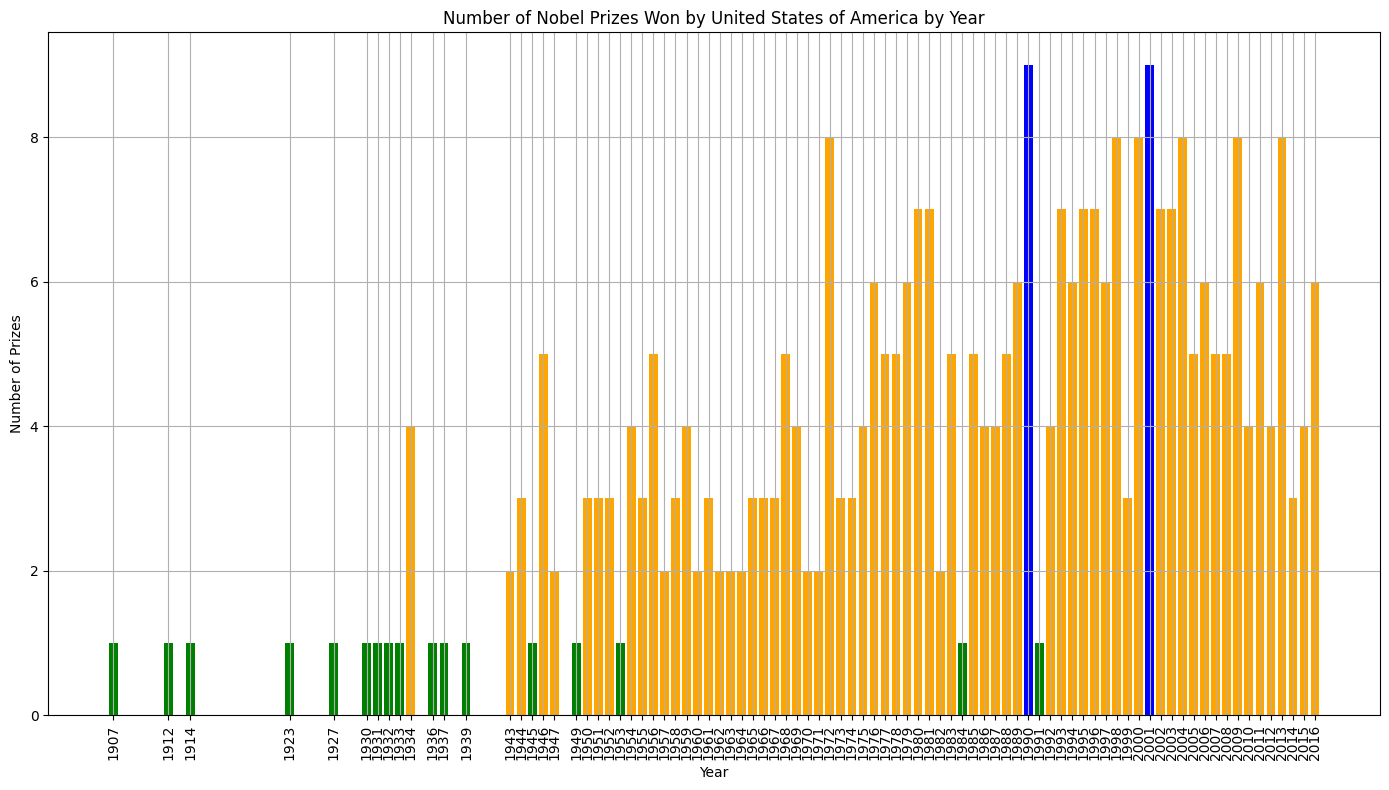

In [83]:
# 4. The number of Nobel Prizes received by the country that won the most Nobel Prizes over the years and the year it received the most awards

# Determine the country with the most awards
most_awards_country = df['organization_country'].value_counts().idxmax()
# Filter the DataFrame to the country with the most awards
country_df = df[df['organization_country'] == most_awards_country]
# Group the DataFrame by year and count the number of prizes won
country_df = country_df.groupby('year')['prize'].count().reset_index()
# Plot the graph
plt.figure(figsize=(14, 8))
plt.bar(country_df['year'], country_df['prize'], color='orange')
# Color the bars for the years with the most awards in blue
max_value = max(country_df['prize'])
for year, prize in zip(country_df['year'], country_df['prize']):
    if prize == max_value:
        plt.bar(year, prize, color='blue')
# Color the bars for the years with the fewest awards in yellow
min_value = min(country_df['prize'])
for year, prize in zip(country_df['year'], country_df['prize']):
    if prize == min_value:
        plt.bar(year, prize, color='green')

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Nobel Prizes Won by {} by Year'.format(most_awards_country))
plt.grid(True)
plt.xticks(country_df['year'], rotation=90)
plt.tight_layout()
plt.show()

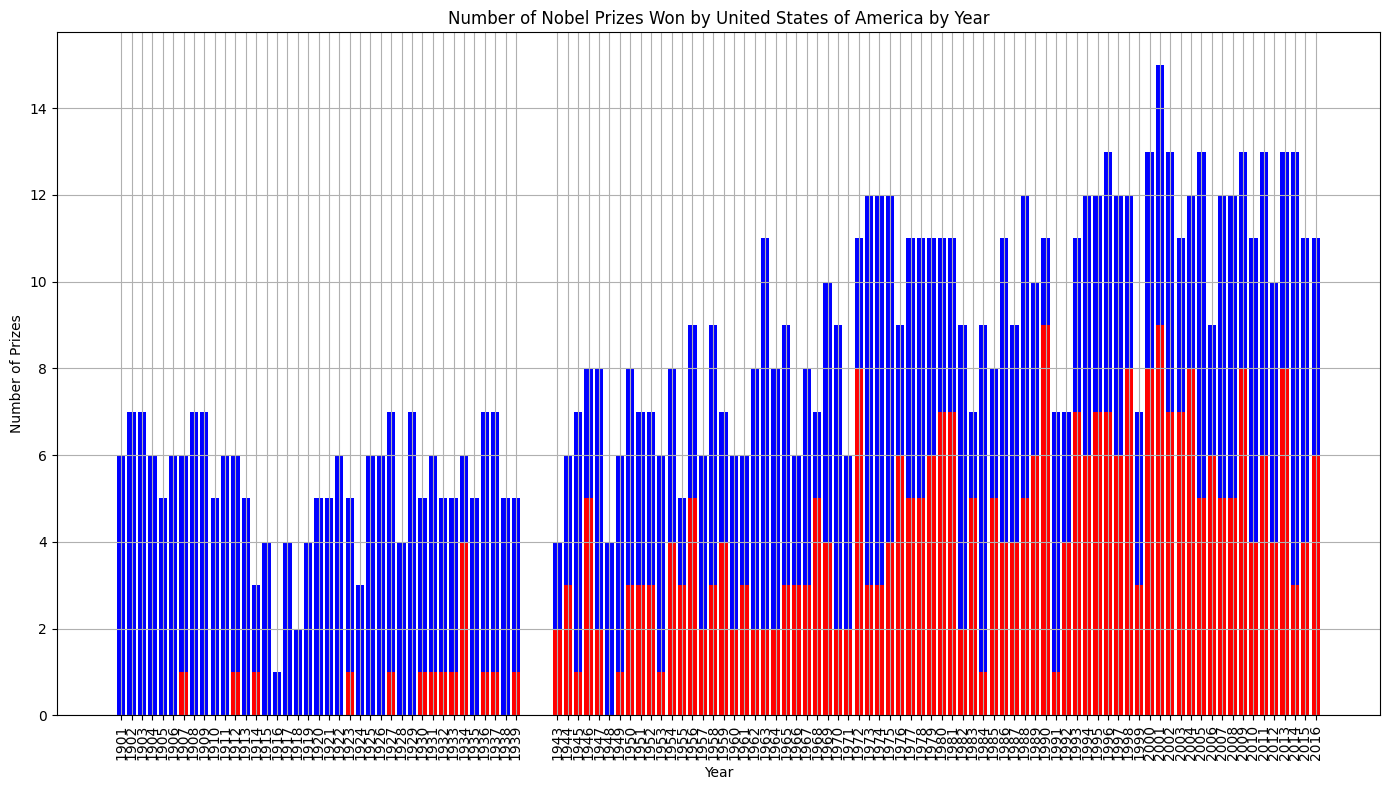

In [84]:
# 4. Combined Chart

# Determine the country with the most awards
most_awards_country = df['organization_country'].value_counts().idxmax()
# Find the years with the most awards
most_awards_years = df[df['organization_country'] == most_awards_country]['year'].value_counts().index
# Find the number of awards in the years with the most awards
most_awards_counts = df[df['organization_country'] == most_awards_country]['year'].value_counts().values
# Find all years
all_years = df['year'].unique()
# Find the number of awards for all years
all_years_counts = [df[df['year'] == year].shape[0] for year in all_years]
# Plot the bar chart
plt.figure(figsize=(14, 8))
# Plot all bars in blue
plt.bar(all_years, all_years_counts, color='blue')
# Color the bars of the country with the most awards in red
for year, count in zip(most_awards_years, most_awards_counts):
    plt.bar(year, count, color='red')

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Nobel Prizes Won by {} by Year'.format(most_awards_country))
plt.grid(True)
plt.xticks(all_years, rotation=90)
plt.tight_layout()
plt.show()

In [85]:
# 5. Age calculation and missing data imputation functions to visualize the gender and age of Nobel laureates by category
# Calculate age
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['age'] = df['year'].dt.year - df['birth_date'].dt.year

# Check for missing values in the 'age' column
missing_age = df['age'].isna().sum()
print("Number of missing age information:", missing_age)
df

Number of missing age information: 28


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0


In [86]:
# 5. Fill in entries with missing age information with the average age

average_age = df['age'].mean()
df['age'].fillna(average_age, inplace=True)

# Convert the 'age' column to integer
df['age'] = df['age'].astype('int64')
df

/tmp/ipython-input-3355119257.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(average_age, inplace=True)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65


In [87]:
# 5. Reorganize the year category to keep only the year

df['year'] = df['year'].dt.year
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65


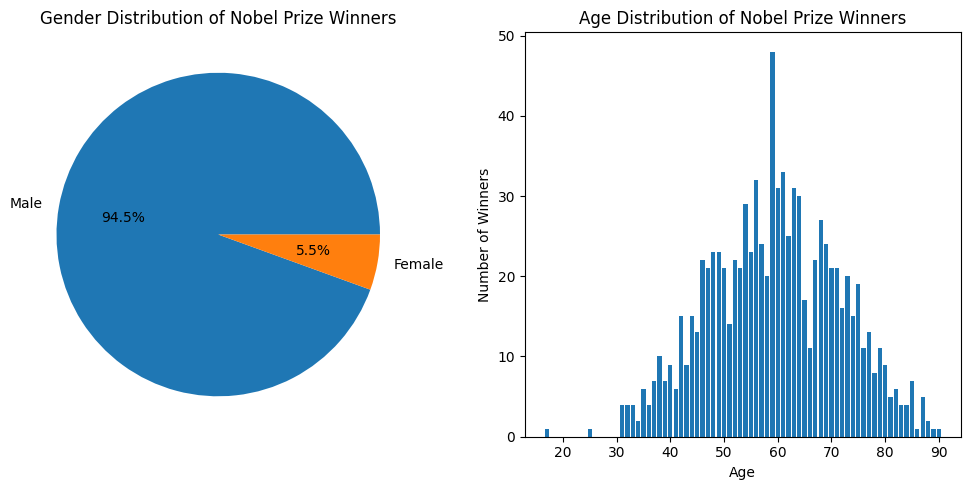

In [67]:
# 5. Plot gender and age distribution charts for all categories

# Pie charts showing gender distribution for all prize categories
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Nobel Prize Winners')

# Histogram charts showing age distribution for all categories
age_distribution = df['age'].value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Number of Winners')
plt.title('Age Distribution of Nobel Prize Winners')
plt.tight_layout()
plt.show()

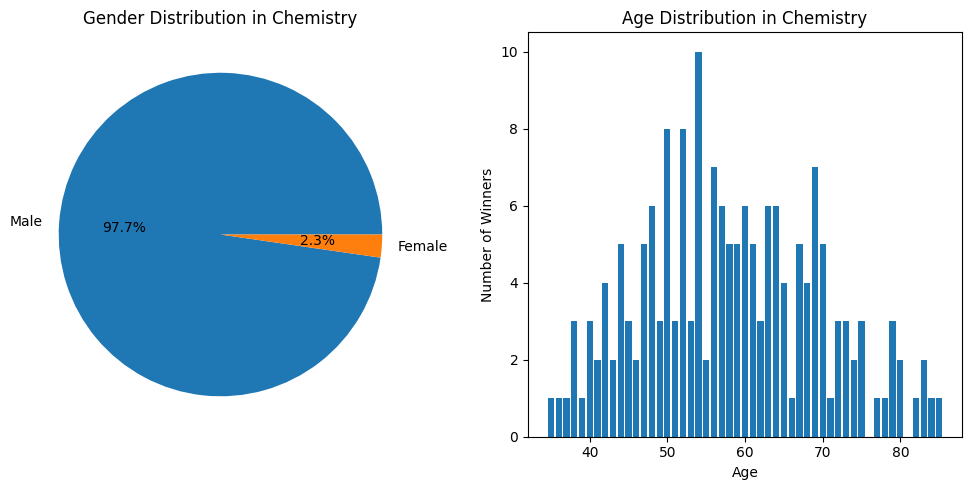

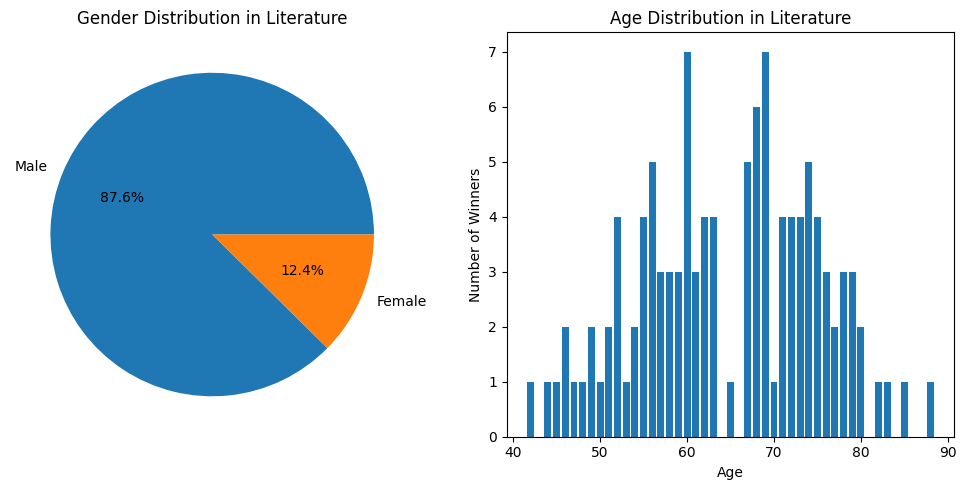

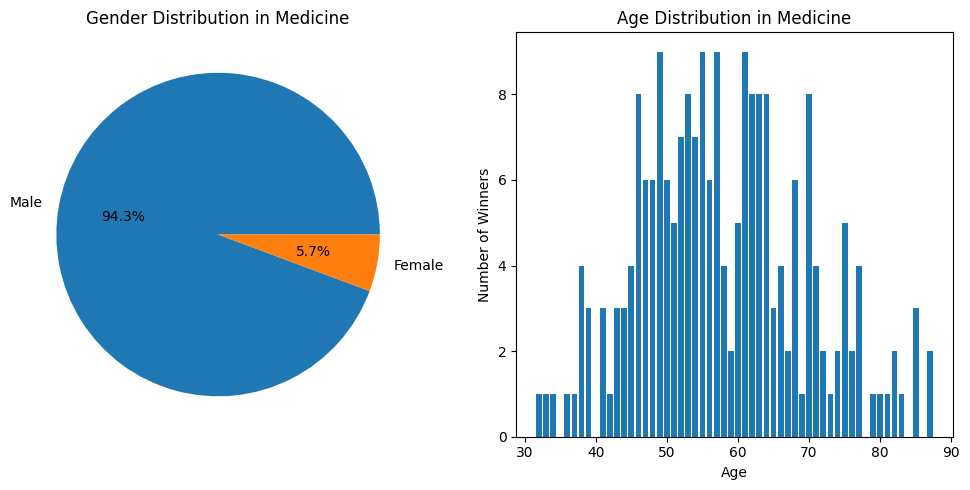

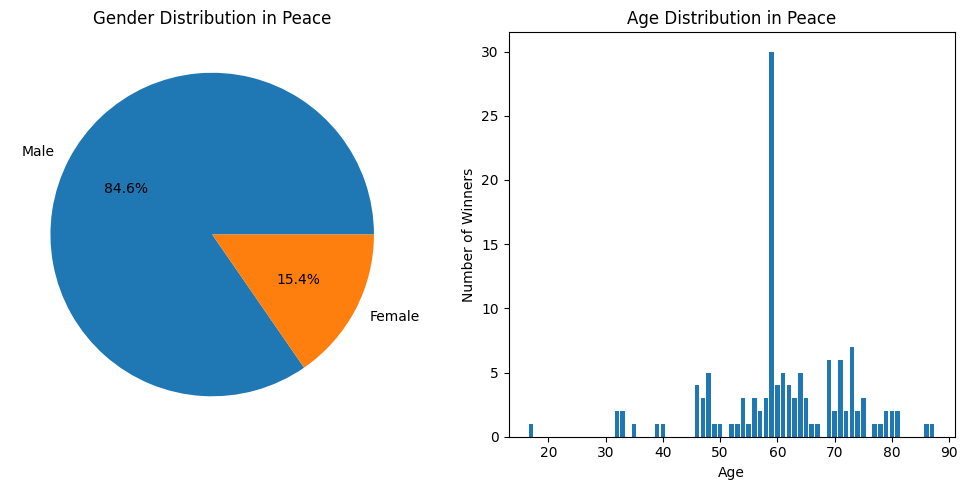

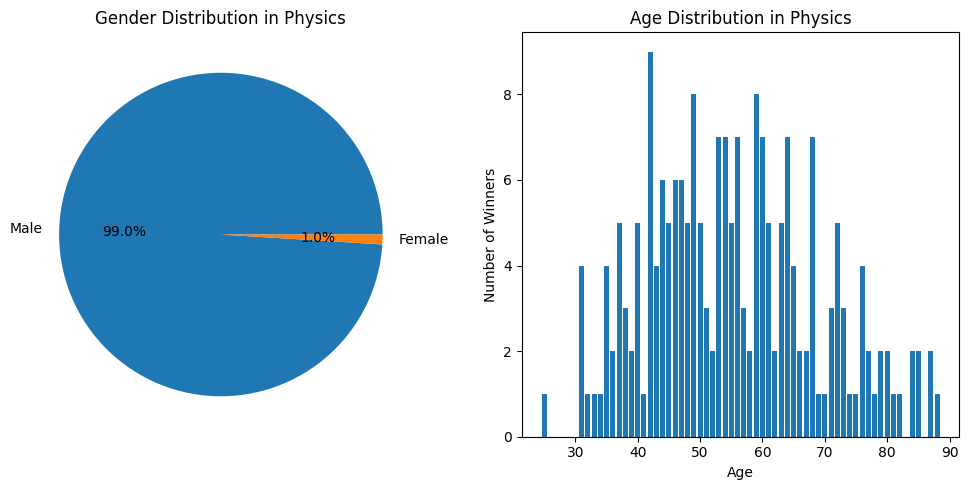

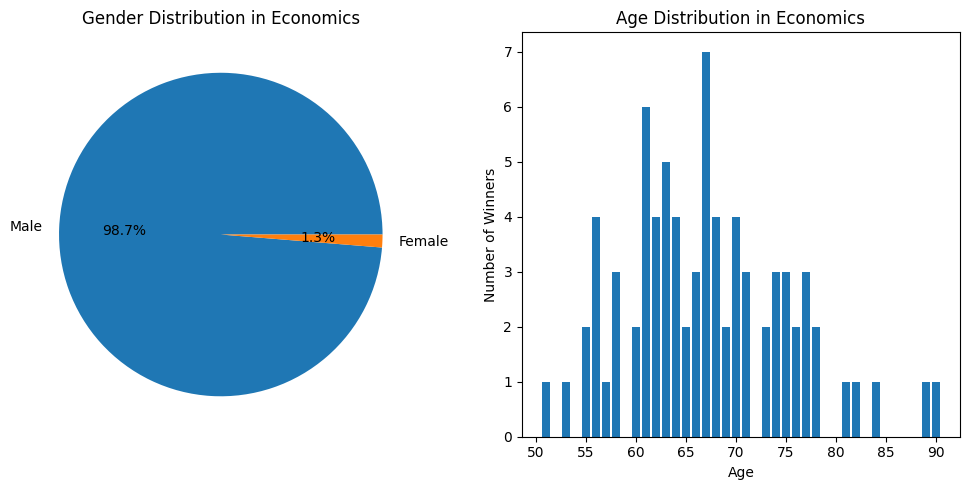

In [68]:
# Plot gender and age distributions for each category separately

for category in df['category'].unique():
    category_df = df[df['category'] == category]

    # Gender distribution charts
    gender_counts = category_df['sex'].value_counts()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    plt.title('Gender Distribution in {}'.format(category))

    # Age distribution charts
    age_distribution = category_df['age'].value_counts().sort_index()
    plt.subplot(1, 2, 2)
    plt.bar(age_distribution.index, age_distribution.values)
    plt.xlabel('Age')
    plt.ylabel('Number of Winners')
    plt.title('Age Distribution in {}'.format(category))

    plt.tight_layout()
    plt.show()

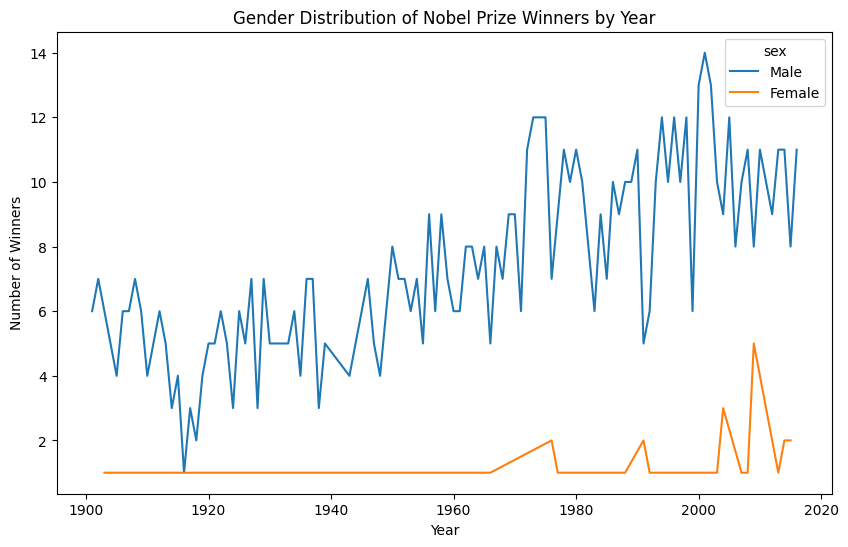

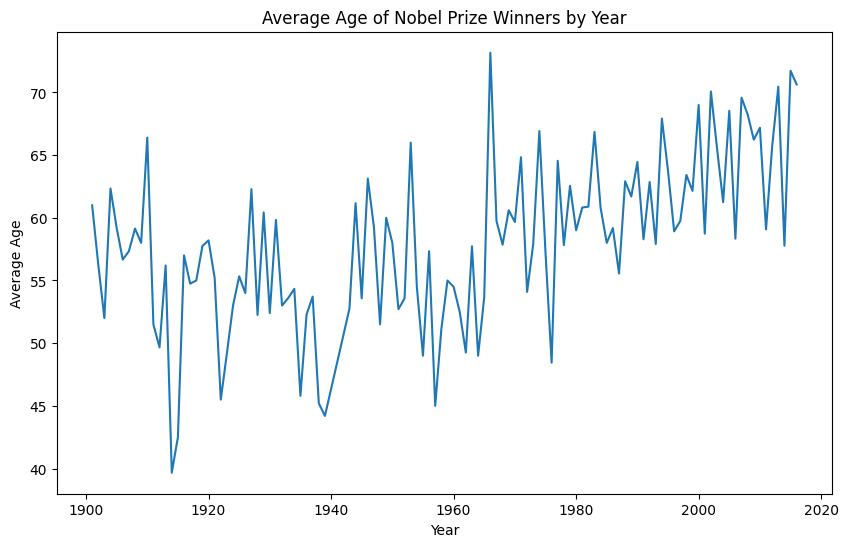

In [69]:
# 5. Gender and age distribution charts based on year

# Calculate gender distribution by year
gender_by_year = df.groupby(['year', 'sex']).size().reset_index(name='count')
# Plot the graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_by_year, x='year', y='count', hue='sex')
plt.xlabel('Year')
plt.ylabel('Number of Winners')
plt.title('Gender Distribution of Nobel Prize Winners by Year')
plt.show()

# Calculate age distribution by year
age_by_year = df.groupby('year')['age'].mean().reset_index(name='average_age')
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(age_by_year['year'], age_by_year['average_age'])
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Age of Nobel Prize Winners by Year')
plt.show()

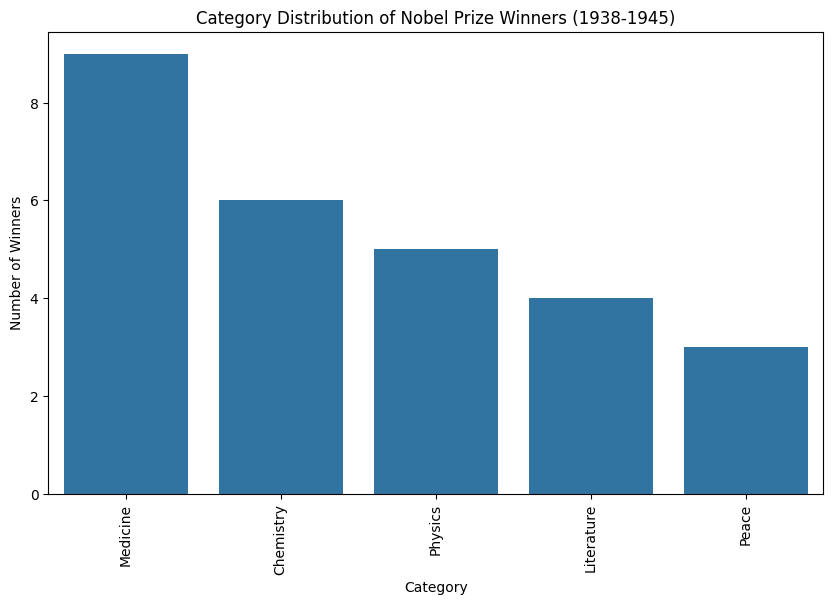

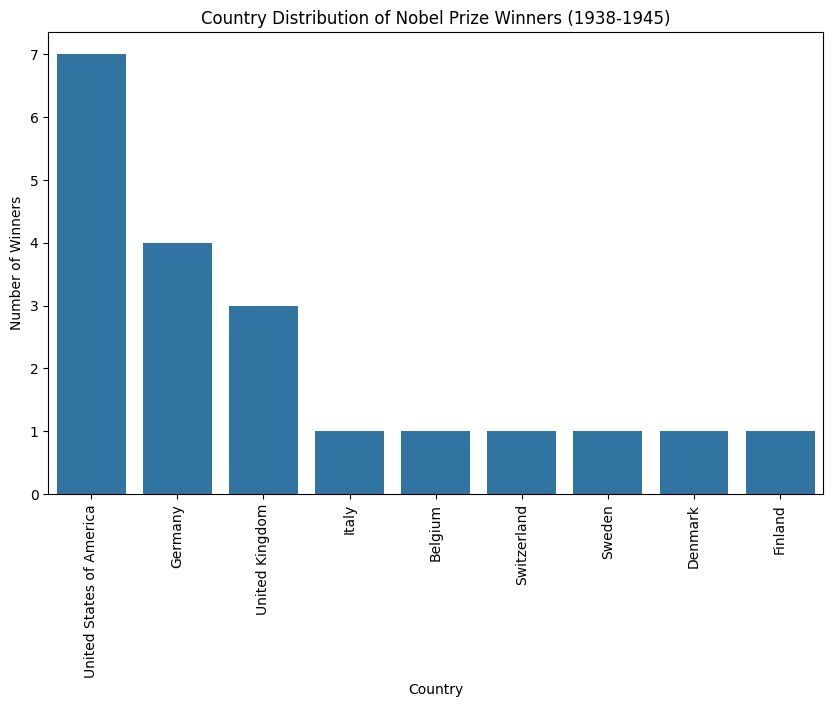

In [70]:
# 6. Visualize and interpret the categories and countries of Nobel laureates between 1938 and 1945.

filtered_df = df[(df['year'] >= 1938) & (df['year'] <= 1945)]
# Group by category
category_counts = filtered_df['category'].value_counts().sort_values(ascending=False)
# Plot category distribution chart
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='category', order=category_counts.index)
plt.xlabel('Category')
plt.ylabel('Number of Winners')
plt.title('Category Distribution of Nobel Prize Winners (1938-1945)')
plt.xticks(rotation=90)
plt.show()

# Group by country
country_counts = filtered_df['organization_country'].value_counts().sort_values(ascending=False)
# Plot country distribution chart
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='organization_country', order=country_counts.index)
plt.xlabel('Country')
plt.ylabel('Number of Winners')
plt.title('Country Distribution of Nobel Prize Winners (1938-1945)')
plt.xticks(rotation=90)
plt.show()

In [71]:
# 6. Show the countries that won awards in the Peace category

filtered_peace = df[(df['year'] >= 1938) & (df['year'] <= 1945) & (df['category'] == 'Peace')]
filtered_peace

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
222,1945,Peace,The Nobel Peace Prize 1945,NaN,1/1,505,Individual,Cordell Hull,1871-10-02,"Olympus, TN",United States of America,Male,NaN,NaN,NaN,1955-07-23,"Bethesda, MD",United States of America,74


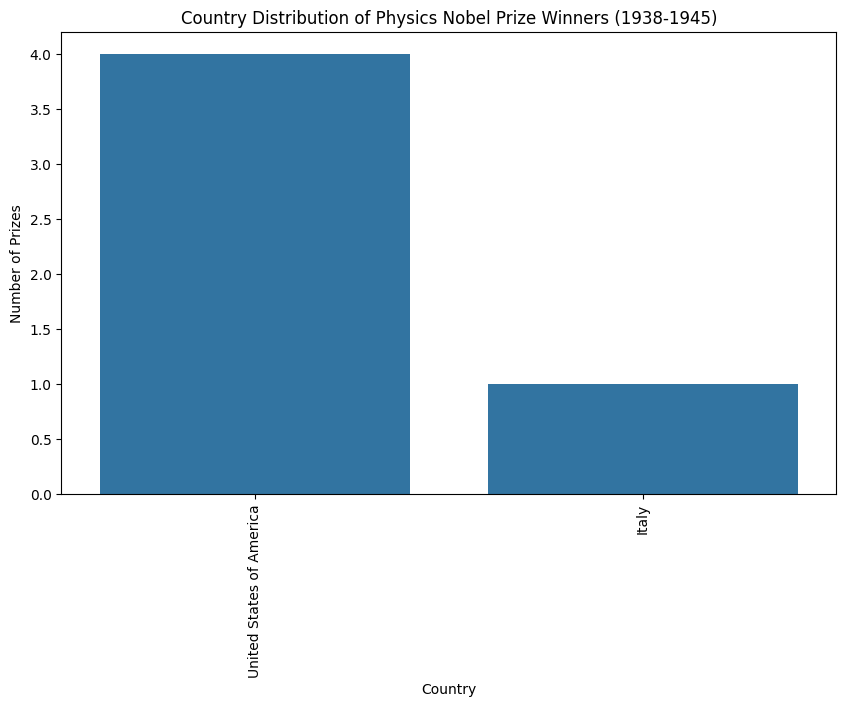

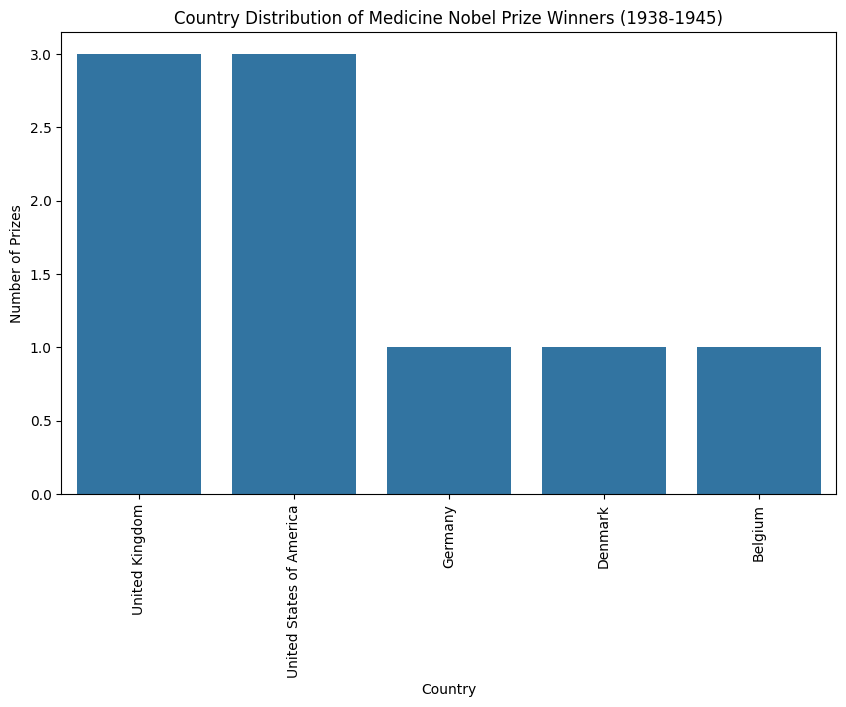

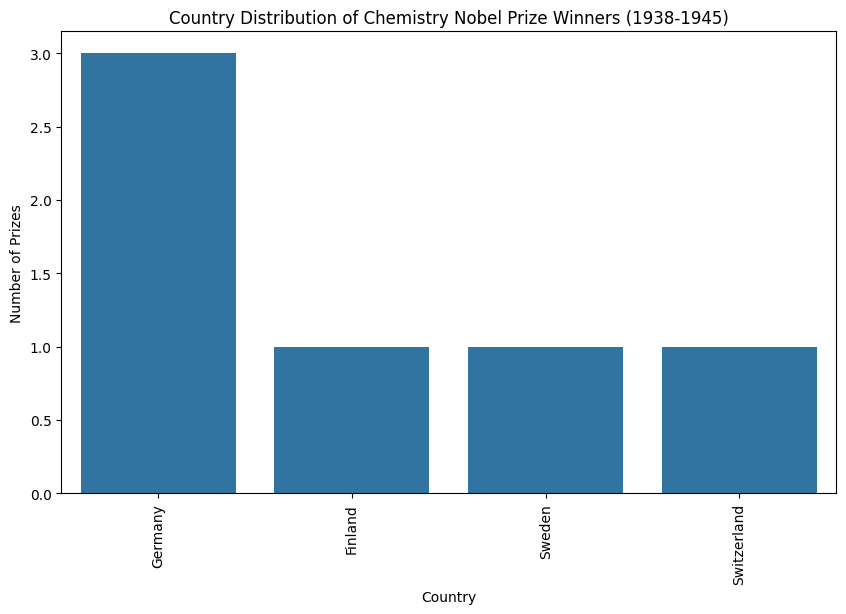

In [72]:
# 6. How many awards did each country receive in each category between 1938 and 1945?

filtered_df = df[(df['year'] >= 1938) & (df['year'] <= 1945)]
# Group and count by category and country
category_country_counts = filtered_df.groupby(['category', 'organization_country']).size().reset_index(name='count')
sorted_counts = category_country_counts.sort_values('count', ascending=False)
# Plot separate graphs for each category
for category in sorted_counts['category'].unique():
    category_df = sorted_counts[sorted_counts['category'] == category]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=category_df, x='organization_country', y='count')
    plt.xlabel('Country')
    plt.ylabel('Number of Prizes')
    plt.title('Country Distribution of {} Nobel Prize Winners (1938-1945)'.format(category))
    plt.xticks(rotation=90)
    plt.show()

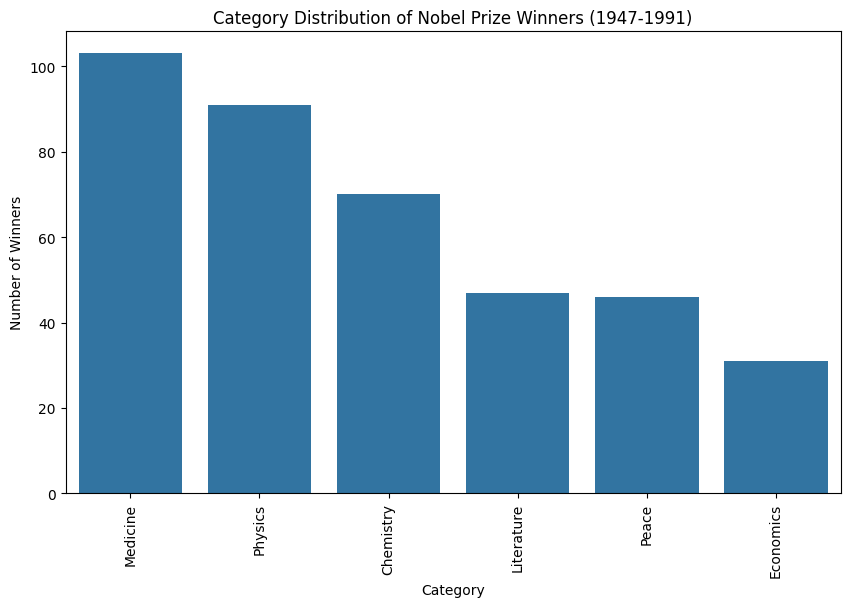

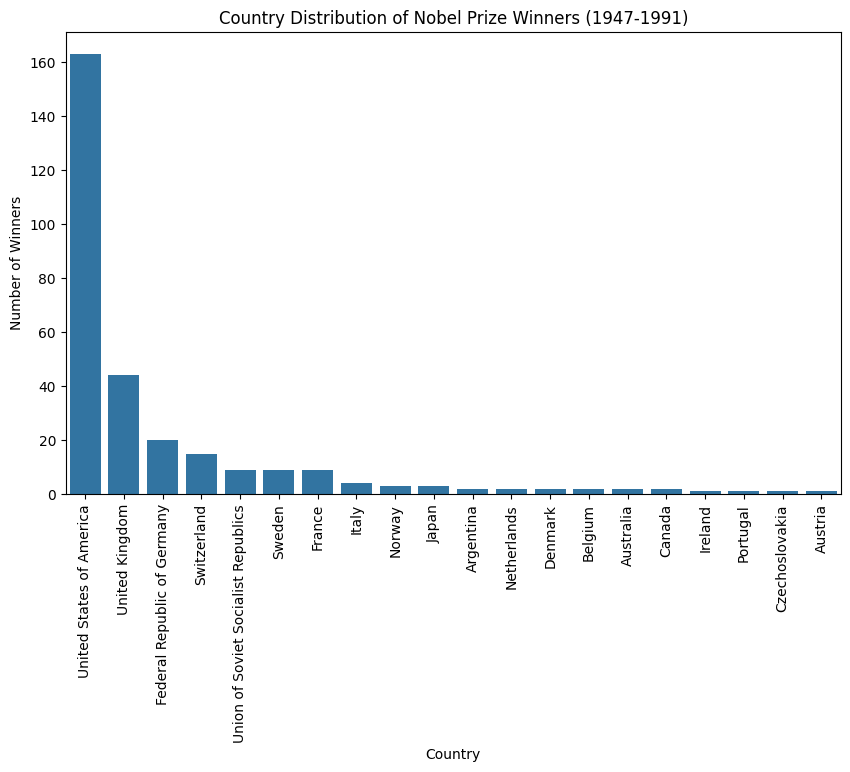

In [73]:
# 7. Visualize and interpret the categories and countries of Nobel laureates between 1947 and 1991.

filtered_df = df[(df['year'] >= 1947) & (df['year'] <= 1991)]
# Group by category
category_counts = filtered_df['category'].value_counts().sort_values(ascending=False)
# Plot category distribution chart
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='category', order=category_counts.index)
plt.xlabel('Category')
plt.ylabel('Number of Winners')
plt.title('Category Distribution of Nobel Prize Winners (1947-1991)')
plt.xticks(rotation=90)
plt.show()

# Group by country
country_counts = filtered_df['organization_country'].value_counts().sort_values(ascending=False)
# Plot country distribution chart
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='organization_country', order=country_counts.index)
plt.xlabel('Country')
plt.ylabel('Number of Winners')
plt.title('Country Distribution of Nobel Prize Winners (1947-1991)')
plt.xticks(rotation=90)
plt.show()

In [74]:
# 7. Show the countries that won awards in the Peace category

filtered_peace = df[(df['year'] >= 1947) & (df['year'] <= 1991) & (df['category'] == 'Peace')]
filtered_peace

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
248,1949,Peace,The Nobel Peace Prize 1949,NaN,1/1,510,Individual,Lord (John) Boyd Orr of Brechin,1880-09-23,Kilmaurs,Scotland,Male,NaN,NaN,NaN,1971-06-25,Edzell,Scotland,69
256,1950,Peace,The Nobel Peace Prize 1950,NaN,1/1,511,Individual,Ralph Bunche,1904-08-07,"Detroit, MI",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1971-12-09,"New York, NY",United States of America,46
262,1951,Peace,The Nobel Peace Prize 1951,NaN,1/1,512,Individual,Léon Jouhaux,1879-07-01,Paris,France,Male,NaN,NaN,NaN,1954-04-28,Paris,France,72
269,1952,Peace,The Nobel Peace Prize 1952,NaN,1/1,513,Individual,Albert Schweitzer,1875-01-14,Kaysersberg,Germany (France),Male,NaN,NaN,NaN,1965-09-04,Lambaréné,Gabon,77
276,1953,Peace,The Nobel Peace Prize 1953,NaN,1/1,514,Individual,George Catlett Marshall,1880-12-31,"Uniontown, PA",United States of America,Male,NaN,NaN,NaN,1959-10-16,"Washington, DC",United States of America,73
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
303,1957,Peace,The Nobel Peace Prize 1957,NaN,1/1,516,Individual,Lester Bowles Pearson,1897-04-23,Toronto,Canada,Male,NaN,NaN,NaN,1972-12-27,Ottawa,Canada,60
311,1958,Peace,The Nobel Peace Prize 1958,NaN,1/1,517,Individual,Georges Pire,1910-02-10,Dinant,Belgium,Male,NaN,NaN,NaN,1969-01-30,Leuven,Belgium,48


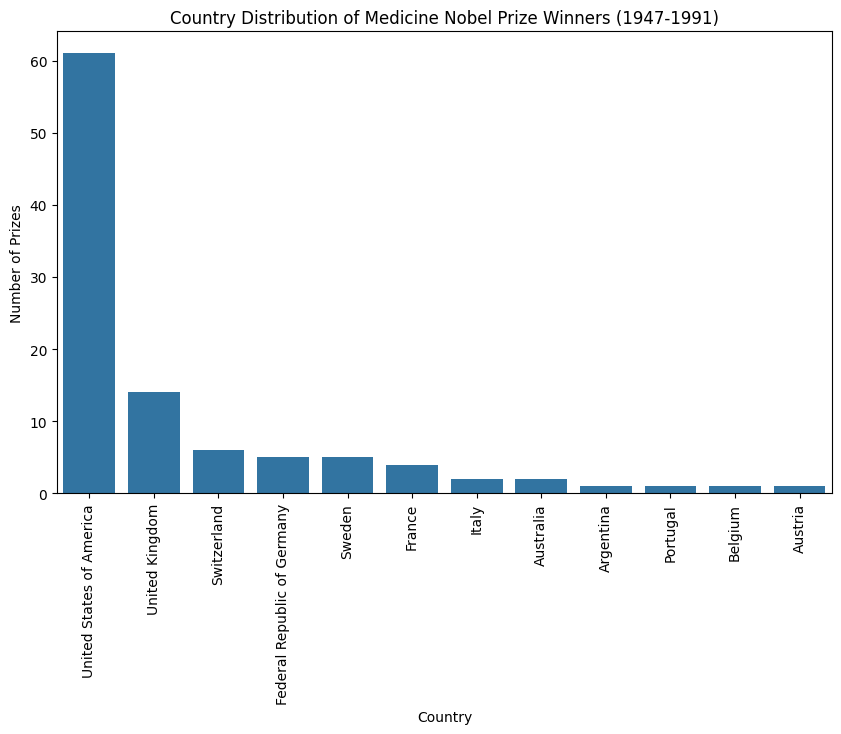

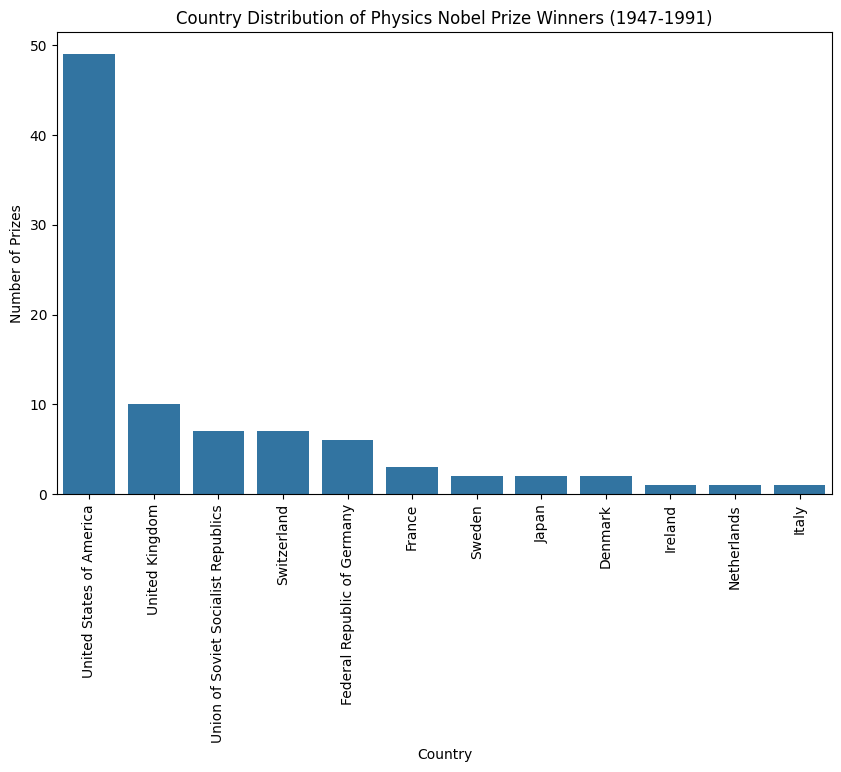

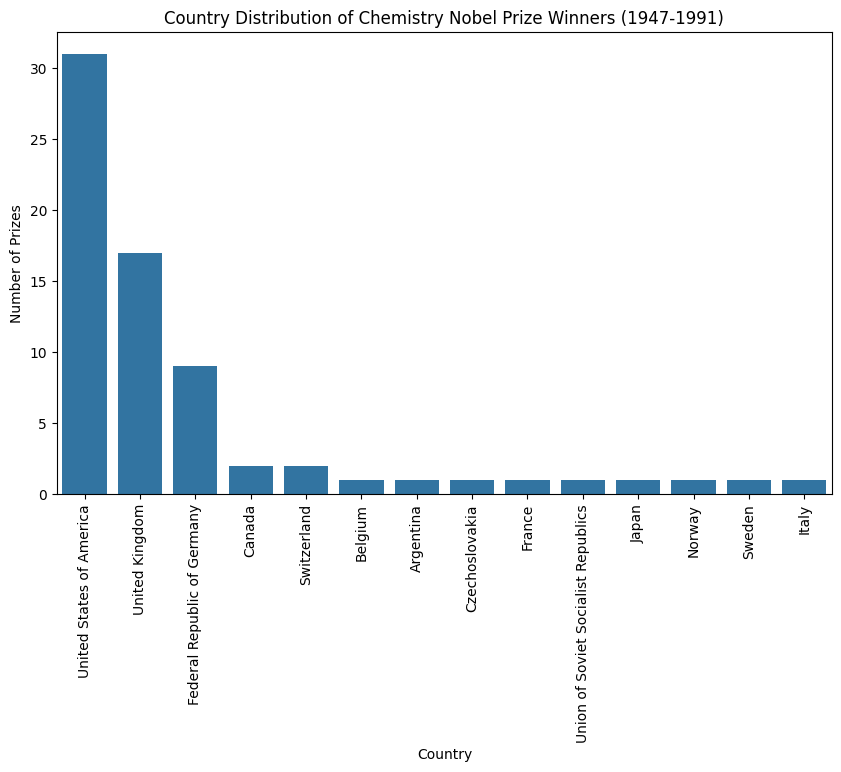

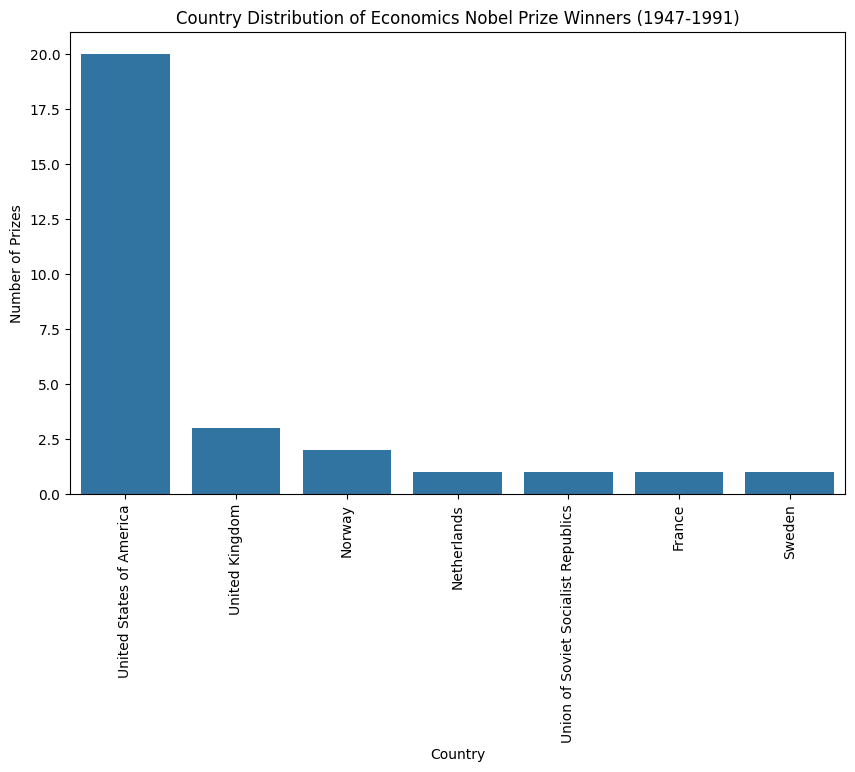

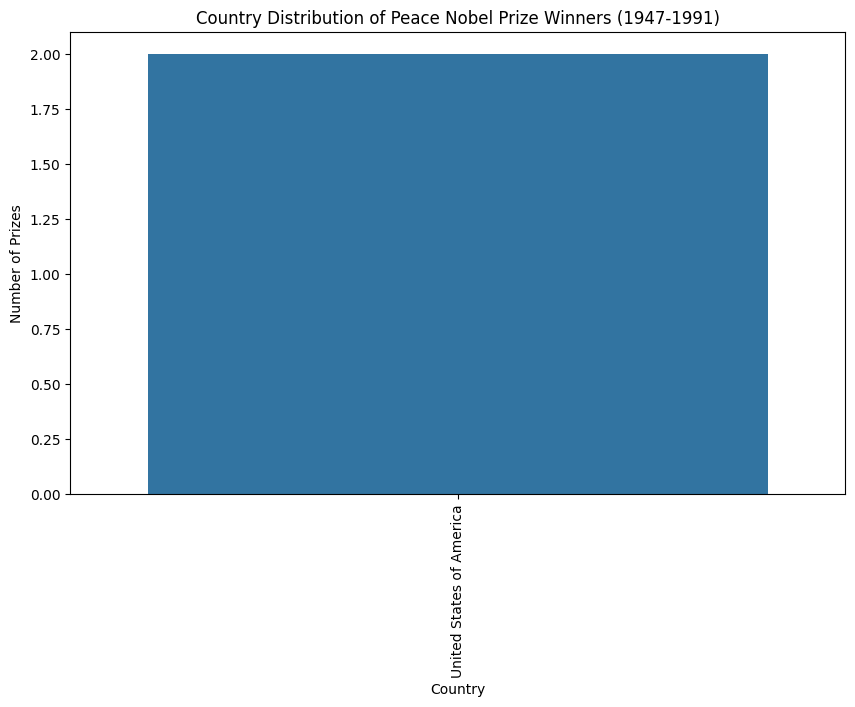

In [75]:
# 7. How many awards did each country receive in each category between 1947 and 1991?

filtered_df = df[(df['year'] >= 1947) & (df['year'] <= 1991)]
# Group and count by category and country
category_country_counts = filtered_df.groupby(['category', 'organization_country']).size().reset_index(name='count')
sorted_counts = category_country_counts.sort_values('count', ascending=False)
# Plot separate graphs for each category
for category in sorted_counts['category'].unique():
    category_df = sorted_counts[sorted_counts['category'] == category]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=category_df, x='organization_country', y='count')
    plt.xlabel('Country')
    plt.ylabel('Number of Prizes')
    plt.title('Country Distribution of {} Nobel Prize Winners (1947-1991)'.format(category))
    plt.xticks(rotation=90)
    plt.show()

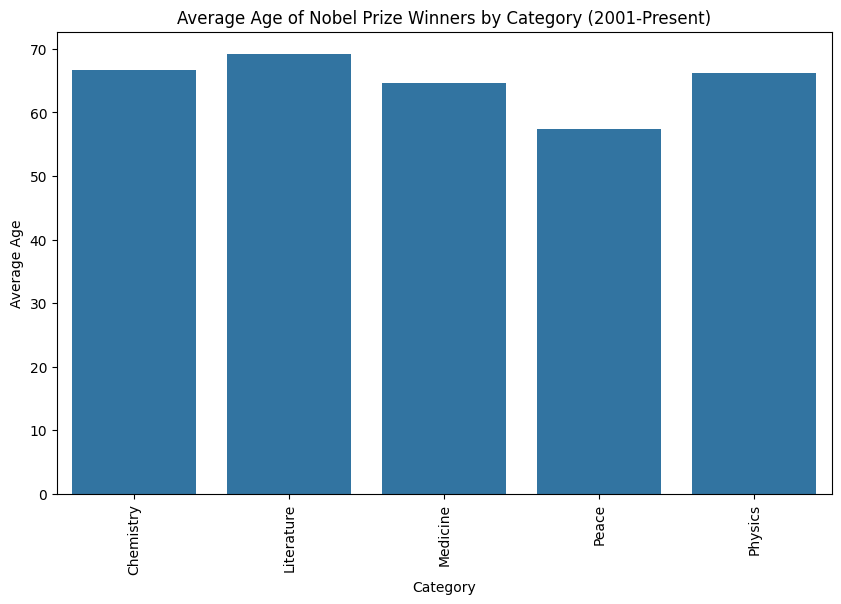

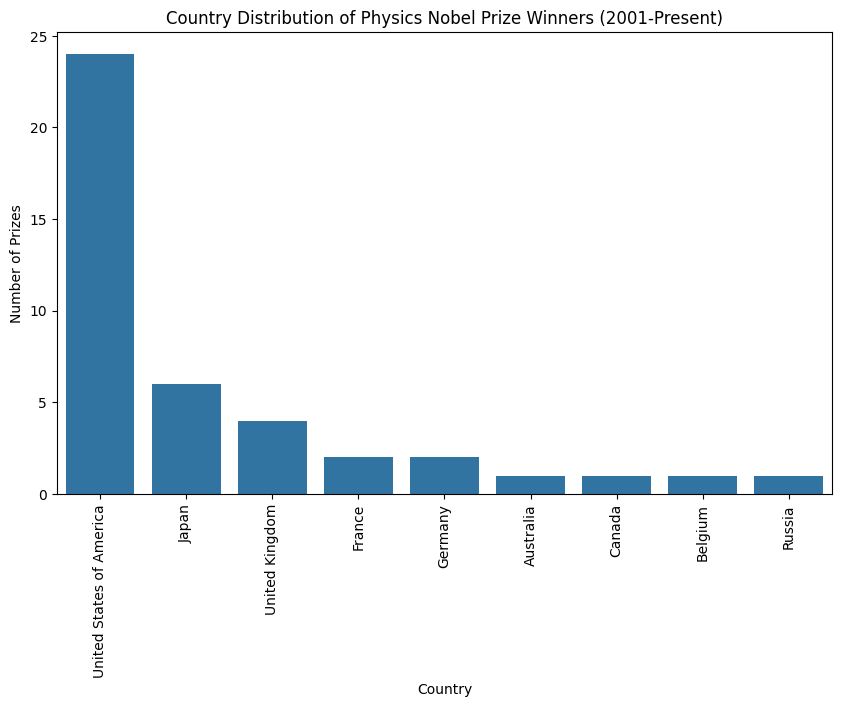

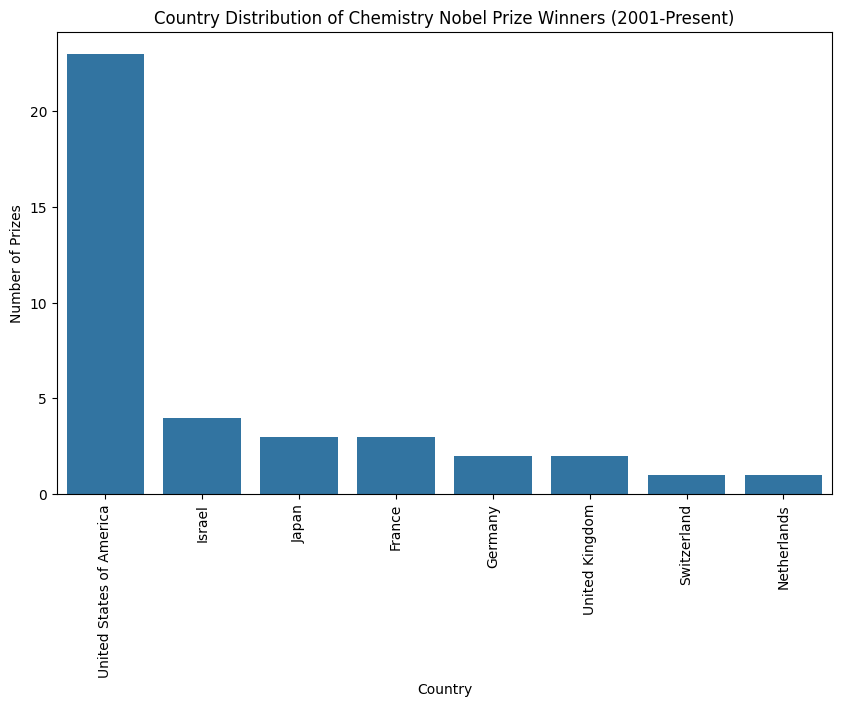

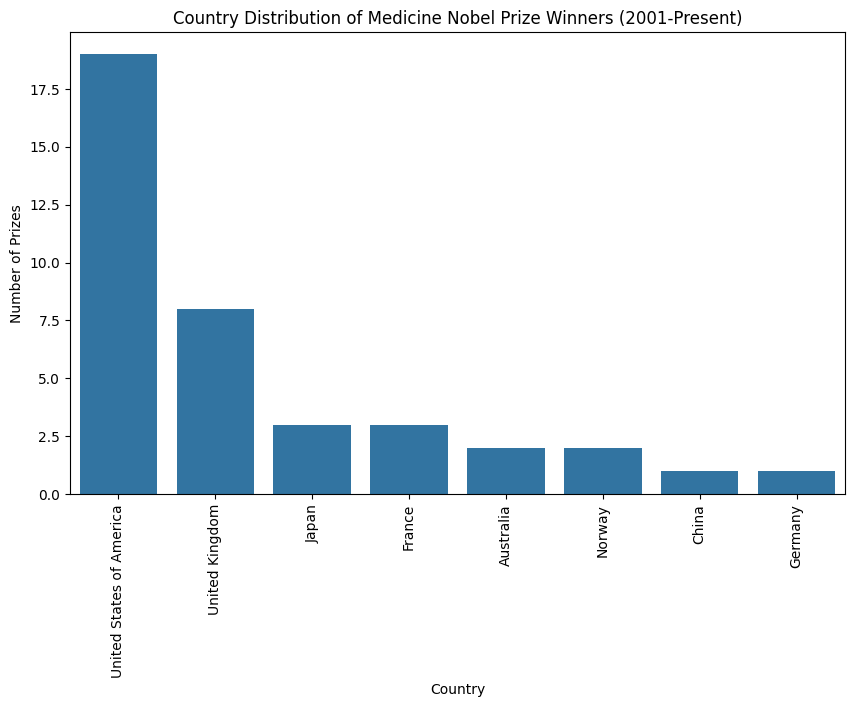

In [76]:
# 8. Age and country-based graphs for categories other than Economics after the year 2000

filtered_df = df[(df['year'] > 2000) & (df['category'] != 'Economics')]
# Calculate age distribution for each category
age_distribution = filtered_df.groupby('category')['age'].mean().reset_index(name='average_age')
# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=age_distribution, x='category', y='average_age')
plt.xlabel('Category')
plt.ylabel('Average Age')
plt.title('Average Age of Nobel Prize Winners by Category (2001-Present)')
plt.xticks(rotation=90)
plt.show()

# Sort the number of awards by country for each category from largest to smallest
sorted_counts = filtered_df.groupby(['category', 'organization_country']).size().reset_index(name='count').sort_values('count', ascending=False)
# Plot separate graphs for each category
for category in sorted_counts['category'].unique():
    category_df = sorted_counts[sorted_counts['category'] == category]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=category_df, x='organization_country', y='count')
    plt.xlabel('Country')
    plt.ylabel('Number of Prizes')
    plt.title('Country Distribution of {} Nobel Prize Winners (2001-Present)'.format(category))
    plt.xticks(rotation=90)
    plt.show()

# Genel Gözlemler:

* Veri seti, 1901'den 2016'ya kadar Nobel Ödülü kazananlara ilişkin bilgiler içermektedir.
* Fizik, Kimya, Fizyoloji veya Tıp, Edebiyat, Barış ve Ekonomi kategorilerinde toplam 934 Nobel Ödülü verilmiştir.
* Nobel ödüllerinin çoğunluğu erkeklere verilmiştir.
* Nobel Ödülü kazananların ortalama yaşı 59'dur.
* En fazla Nobel ödülünü ABD (%37) kazanırken, onu İngiltere (%12) ve Almanya (%11) takip ediyor.

# Trendler ve Desenler:

* Verilen Nobel Ödüllerinin sayısı zamanla arttı.
* Nobel Ödülü kazanan kadınların oranı son yıllarda arttı ancak hâlâ nispeten düşük.
* Nobel Ödülü kazananların ortalama yaşı zaman içinde nispeten sabit kaldı.
* ABD, Nobel Ödülü kazananları açısından sürekli olarak lider ülke olmuştur.

# İlginç Bilgiler:

* Marie Curie iki farklı bilim alanında (Fizik ve Kimya) Nobel Ödülü kazanan tek kişidir.
* Linus Pauling, paylaşılmayan iki Nobel Ödülü'nü (Kimya ve Barış) kazanan tek kişidir.
* Nobel Ödülü'nü kazanan en genç kişi, 17 yaşında Barış Ödülü'nü kazanan Malala Yousafzai'ydi.
* Nobel Ödülü sahibi en yaşlı kişi, 90 yaşında Ekonomi Ödülü'nü kazanan Leonid Hurwicz'di.

# Potansiyel Önyargılar:

* Veri seti yalnızca Nobel Ödülü kazananları içermektedir ve bunlar tüm bilim adamlarını ve araştırmacıları temsil etmeyebilir.
* Nobel Ödüllerini verme kriterleri zaman içinde değişmiş olabilir ve bu durum kazananların dağılımını etkileyebilir.
* Veri seti, Nobel Ödülü kazananların çalışmalarının etkisi hakkında ek bilgiler sağlayabilecek bilgiler içermiyor.

Genel olarak, Nobel Ödülü veri seti bilimsel ve kültürel başarıların tarihine dair değerli bilgiler sağlıyor. Ancak sonuçları yorumlarken verilerin olası önyargılarının ve sınırlamalarının farkında olmak önemlidir.

# General Observations:

* The dataset contains information about Nobel Prize winners from 1901 to 2016.
* A total of 934 Nobel Prizes have been awarded in the categories of Physics, Chemistry, Physiology or Medicine, Literature, Peace, and Economics.
* The majority of Nobel Prizes have been awarded to men.
* The average age of Nobel Prize winners is 59.
* The United States of America won the most Nobel Prizes (37%), followed by the United Kingdom (12%) and Germany (11%).

# Trends and Patterns:

* The number of Nobel Prizes awarded has increased over time.
* The proportion of women Nobel Prize winners has increased in recent years but is still relatively low.
* The average age of Nobel Prize winners has remained relatively constant over time.
* The United States of America has consistently been the leading country in terms of Nobel Prize winners.

# Interesting Facts:

* Marie Curie is the only person to have won Nobel Prizes in two different scientific fields (Physics and Chemistry).
* Linus Pauling is the only person to have won two unshared Nobel Prizes (Chemistry and Peace).
* The youngest person to win a Nobel Prize was Malala Yousafzai, who won the Peace Prize at the age of 17.
* The oldest person to win a Nobel Prize was Leonid Hurwicz, who won the Economics Prize at the age of 90.

# Potential Biases:

* The dataset includes only Nobel Prize winners and may not be representative of all scientists and researchers.
* The criteria for awarding Nobel Prizes may have changed over time, which could affect the distribution of winners.
* The dataset does not include information about the impact of Nobel Prize winners' work, which could provide additional insights.

Overall, the Nobel Prize dataset provides valuable insights into the history of scientific and cultural achievements. However, it is important to be aware of the potential biases and limitations of the data when interpreting the results.